In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy
import warnings
warnings.filterwarnings('ignore')

tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

c:\pythonn\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data1 = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
data2 = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [3]:
data1.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
data1.tail()

,is_sarcastic,headline,article_link
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...
28618,1,dad clarifies this not a food stop,https://www.theonion.com/dad-clarifies-this-no...


In [5]:
data2.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
data2.tail()

,article_link,headline,is_sarcastic
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0
26708,https://www.huffingtonpost.com/entry/gourmet-g...,gourmet gifts for the foodie 2014,0


In [7]:
data1.shape

(28619, 3)

In [8]:
data2.shape

(26709, 3)

In [9]:
data1.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [10]:
data2.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [11]:
data1.duplicated().sum()

2

In [12]:
data1 = data1.drop_duplicates()

In [13]:
data2.duplicated().sum()

1

In [14]:
data2 = data2.drop_duplicates()

In [15]:
data1.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [16]:
data2.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28617 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28617 non-null  int64 
 1   headline      28617 non-null  object
 2   article_link  28617 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26708 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26708 non-null  object
 1   headline      26708 non-null  object
 2   is_sarcastic  26708 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 834.6+ KB


In [19]:
data1.describe()

,is_sarcastic
count,28617.000000
mean,0.476395
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [21]:
data2.describe()

,is_sarcastic
count,26708.000000
mean,0.438970
std,0.496271
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
data1.nunique()

is_sarcastic        2
headline        28503
article_link    28617
dtype: int64

In [23]:
data2.nunique()

article_link    26708
headline        26602
is_sarcastic        2
dtype: int64

In [24]:
data1['is_sarcastic'].unique()

array([1, 0], dtype=int64)

In [25]:
data1['is_sarcastic'].value_counts()

0    14984
1    13633
Name: is_sarcastic, dtype: int64

In [26]:
data2['is_sarcastic'].unique()

array([0, 1], dtype=int64)

In [27]:
data2['is_sarcastic'].value_counts()

0    14984
1    11724
Name: is_sarcastic, dtype: int64

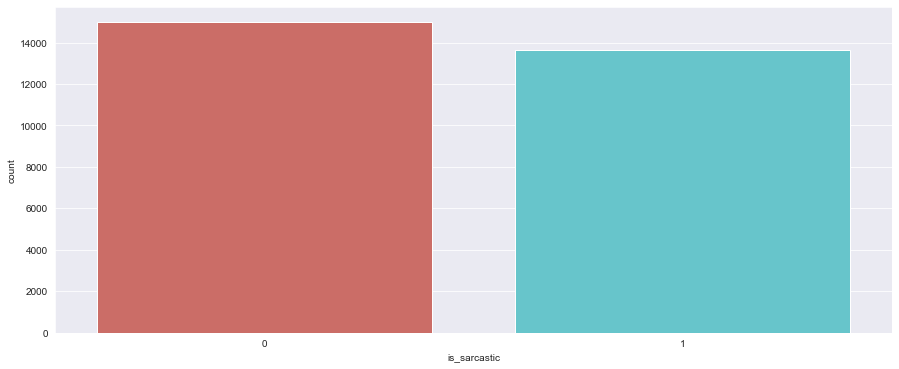

In [31]:
plt.figure(figsize = (15,6))
sns.countplot(data1['is_sarcastic'], data = data1, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

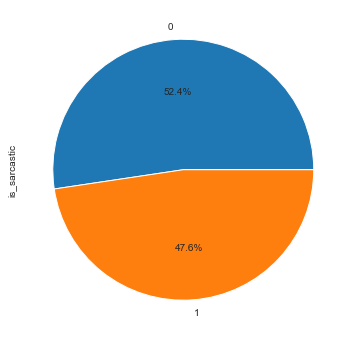

In [33]:
plt.figure(figsize = (15,6))
data1['is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.xticks(rotation = 90)
plt.show()

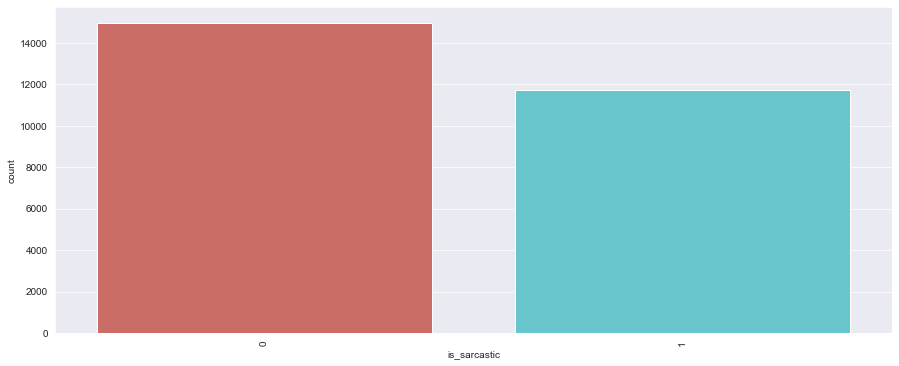

In [34]:
plt.figure(figsize = (15,6))
sns.countplot(data2['is_sarcastic'], data = data2, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

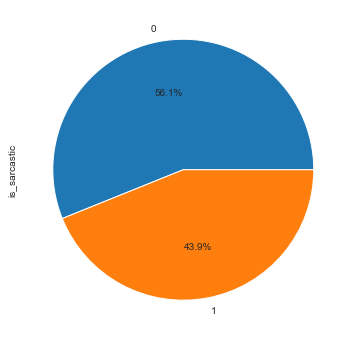

In [35]:
plt.figure(figsize = (15,6))
data2['is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.xticks(rotation = 90)
plt.show()

In [36]:
data1 = data1[['headline','is_sarcastic']]
data2 = data2[['headline','is_sarcastic']]

In [37]:
data = pd.concat([data1,data2])
data.reset_index(drop=True, inplace=True)

In [38]:
data.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


In [39]:
data.tail()

,headline,is_sarcastic
55320,american politics in moral free-fall,0
55321,america's best 20 hikes,0
55322,reparations and obama,0
55323,israeli ban targeting boycott supporters raise...,0
55324,gourmet gifts for the foodie 2014,0


In [40]:
data.shape

(55325, 2)

In [45]:
data1 = data.groupby('is_sarcastic').count().reset_index()

In [46]:
data1

,is_sarcastic,headline
0,0,29968
1,1,25357


In [47]:
fig1 = px.bar(data.groupby('is_sarcastic').count().reset_index(), x='headline',title='Count of Sarcastic and Genuine Headlines')

In [48]:
fig1

In [52]:
stop_words = stopwords.words('english')
stop_words.remove('not')

def text_cleaning(x):
    
    headline = re.sub('\s+\n+', ' ', x) # Eliminate duplicate whitespaces using wildcards
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    # headline = re.sub('\s+\n+','[^a-zA-Z0-9]', ' ', x) error 
    headline = headline.lower()
    headline = headline.split()
    
    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)
    
    return headline

In [50]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

data['entity'] = data['headline'].progress_apply(get_entities)

100%|███████████████████████████████████████████████████████████████████████████| 55325/55325 [08:51<00:00, 104.10it/s]


In [53]:
data['clean_headline'] = data['headline'].apply(text_cleaning)

In [54]:
data['sentence_length'] = data['clean_headline'].apply(lambda x: len(x.split()))

In [55]:
data.head()

,headline,is_sarcastic,entity,clean_headline,sentence_length
0,thirtysomething scientists unveil doomsday clo...,1,CARDINAL,thirtysomething scientists unveil doomsday clo...,7
1,dem rep. totally nails why congress is falling...,0,ORG,dem rep totally nail congress fall short gende...,10
2,eat your veggies: 9 deliciously different recipes,0,CARDINAL,eat veggies 9 deliciously different recipes,6
3,inclement weather prevents liar from getting t...,1,,inclement weather prevent liar get work,6
4,mother comes pretty close to using word 'strea...,1,,mother come pretty close use word stream corre...,8


In [56]:
data.tail()

,headline,is_sarcastic,entity,clean_headline,sentence_length
55320,american politics in moral free-fall,0,NORP,american politics moral free fall,5
55321,america's best 20 hikes,0,"GPE,CARDINAL",america best 20 hike,4
55322,reparations and obama,0,,reparations obama,2
55323,israeli ban targeting boycott supporters raise...,0,NORP,israeli ban target boycott supporters raise al...,8
55324,gourmet gifts for the foodie 2014,0,DATE,gourmet gift foodie 2014,4


In [58]:
fig3 = px.histogram(data, x="sentence_length",height=700, color='is_sarcastic', title="Headlines Length Distribution", 
                    marginal="box")

In [59]:
fig3

In [60]:
data[data['sentence_length']==107]['headline']

7302    hot wheels ranked number one toy for rolling d...
Name: headline, dtype: object

In [61]:
data.drop(data[data['sentence_length'] == 107].index, inplace = True)
data.reset_index(inplace=True, drop=True)

In [62]:
fig4 = px.histogram(data, x="sentence_length",height=700, color='is_sarcastic', title="Headlines Length Distribution", 
                    marginal="box")

In [63]:
fig4

In [64]:
data['contains_number'] = data['clean_headline'].apply(lambda x: bool(re.search(r'\d+', x)))

In [65]:
data.head()

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
0,thirtysomething scientists unveil doomsday clo...,1,CARDINAL,thirtysomething scientists unveil doomsday clo...,7,False
1,dem rep. totally nails why congress is falling...,0,ORG,dem rep totally nail congress fall short gende...,10,False
2,eat your veggies: 9 deliciously different recipes,0,CARDINAL,eat veggies 9 deliciously different recipes,6,True
3,inclement weather prevents liar from getting t...,1,,inclement weather prevent liar get work,6,False
4,mother comes pretty close to using word 'strea...,1,,mother come pretty close use word stream corre...,8,False


In [66]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='DATE')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
39568,here are all the 2017 grammy winners,0,DATE,2017 grammy winners,3,True
1569,huffpost rise: october 30th,0,DATE,huffpost rise october 30th,4,True
31575,13 #ridiculousexcusestostayhome -- boomer-style,0,DATE,13 ridiculousexcusestostayhome boomer style,4,True
43558,5 summer recipes you can bring anywhere,0,DATE,5 summer recipes bring anywhere,5,True
4786,this 23-month-old is probably more stylish tha...,0,DATE,23 month old probably stylish,5,True
14744,meet your 2014 hot dog hero,0,DATE,meet 2014 hot dog hero,5,True
38023,these were the hottest baby names of 2017,0,DATE,hottest baby name 2017,4,True
19076,listen up! my favorite americana discoveries o...,0,DATE,listen favorite americana discoveries 2014,5,True
33132,you're 10 days away from more happiness,0,DATE,10 days away happiness,4,True
43054,"news roundup for july 10, 2017",0,DATE,news roundup july 10 2017,5,True


In [67]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='TIME')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
21537,jcpenney abandons 45-second sale,1,TIME,jcpenney abandon 45 second sale,5,True
2240,donut shop gets weird after 11 a.m.,1,TIME,donut shop get weird 11,5,True
2961,"how to be nicer, healthier and more focused in...",0,TIME,nicer healthier focus 15 minutes,5,True
35266,23-hour suicide watch a failure,1,TIME,23 hour suicide watch failure,5,True
13455,"it's just 15 minutes to a grown-up, but not to...",0,TIME,15 minutes grow not kid,5,True
3409,man turns vegetarian for 36 hours,1,TIME,man turn vegetarian 36 hours,5,True
40168,donut shop gets weird after 11 a.m.,1,TIME,donut shop get weird 11,5,True
25834,23-hour suicide watch a failure,1,TIME,23 hour suicide watch failure,5,True
26820,email from mom sent at 5:32 a.m.,1,TIME,email mom send 5 32,5,True
11323,day chalked up as loss by 10:15 a.m.,1,TIME,day chalk loss 10 15,5,True


In [68]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='CARDINAL')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
3935,calle 13 explores the power of a kiss,0,CARDINAL,calle 13 explore power kiss,5,True
5918,11 comedians playing comedians on tv,0,CARDINAL,11 comedians play comedians tv,5,True
25983,10 places to have a 'frozen' vacation,0,CARDINAL,10 place freeze vacation,4,True
52040,6 exercises that will transform your body,0,CARDINAL,6 exercise transform body,4,True
31235,why you need to brag more and 3 ways to do it,0,CARDINAL,need brag 3 ways,4,True
4858,electing a president: 5 things to consider,0,CARDINAL,elect president 5 things consider,5,True
1209,this is what it was like to go to the airport ...,0,CARDINAL,like go airport 9 11,5,True
25272,more than 12 million enroll in obamacare,0,CARDINAL,12 million enroll obamacare,4,True
34262,10 ways i am failing adulthood,0,CARDINAL,10 ways fail adulthood,4,True
47048,6 treatable conditions that mimic dementia,0,CARDINAL,6 treatable condition mimic dementia,5,True


In [69]:
sarcastic = data[data['is_sarcastic']==1]['clean_headline'].tolist()
genuine = data[data['is_sarcastic']==0]['clean_headline'].tolist()

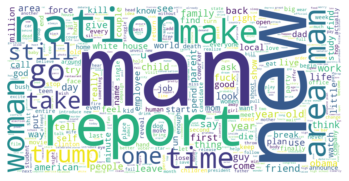

In [71]:
wordcloud = WordCloud(max_words=500, width=1200, height = 600, background_color='white').generate(" ".join(sarcastic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

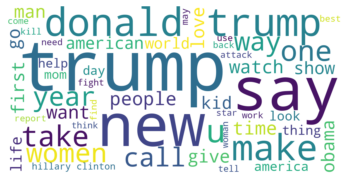

In [72]:
wordcloud = WordCloud(max_words=50, width=1200, height = 600, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [74]:
sentences = data['clean_headline']
label = data['is_sarcastic']

In [80]:
X_train, X_val, y_train, y_val = train_test_split(sentences, label, test_size=0.2, stratify=label, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

In [81]:
max_len = 20       
oov_token = '00_V' 
padding_type = 'post'
trunc_type = 'post'  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  20895


In [82]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [83]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [84]:
embed_dim = 50  
heads = 2  
neurons = 32
maxlen = 20
vocab_size = 20910

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [85]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddin  (None, 20, 50)           1046500   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_encoder (Transf  (None, 20, 50)           23832     
 ormerEncoder)                                                   
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 50)                0     

In [86]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 1, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [ ]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=25,
                    batch_size=32, callbacks=[earlystopping])